### Task 1
### The Sparks Foundation Feb2023 - Data Science and Business Analytic intern

## Name -  Atharva Agrawal
## GRIP - The Sparks Foundation
## Role - Data Science & Business Analytics
## February (2023) Batch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Objective :- Predict the percentage of students depending upon their study hours

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Spark foundation dataset/scores.csv")

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


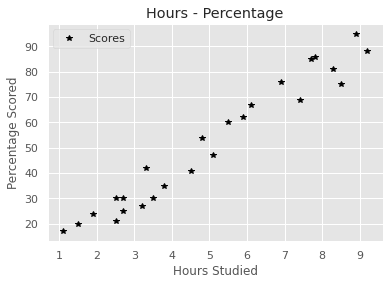

In [9]:
#Plotting the distribution of scores using Scatter plot
df.plot(x='Hours', y='Scores', color='black', style='*')  
plt.title('Hours - Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### The Scatter plot showing kind of linear relationship.

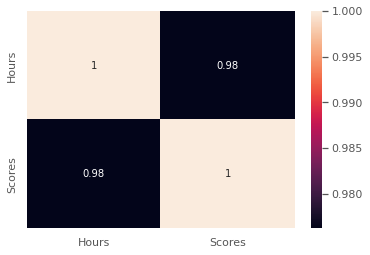

In [10]:
## Checking correlation using different methods 
sns.heatmap(df.corr(method='pearson'),annot=True)

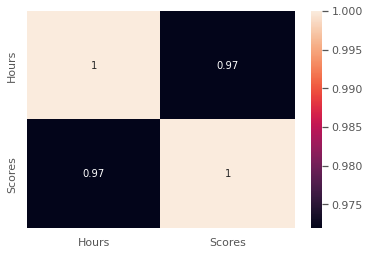

In [11]:
sns.heatmap(df.corr(method='spearman'),annot=True)

In [12]:
X = df.drop('Scores',axis=1).values
y = df['Scores'].values

In [13]:
## Spliting testing and training data using train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=8)

In [14]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (20, 1)
Shape of X_test (5, 1)
Shape of y_train (20,)
Shape of y_test (5,)


Text(0, 0.5, 'Percentage Scored')

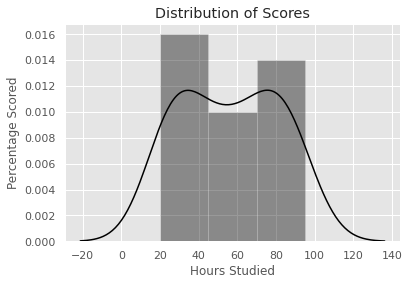

In [15]:
sns.distplot(y_train, kde=True, color='black',)
plt.title('Distribution of Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')

### Model Building

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Score",round(lr.score(X_test,y_test),4)*100)

Score 89.72


In [17]:
#predicting the test set results
y_pred = lr.predict(X_test)

# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred.head(5)

,Actual,Predicted
0,67,62.409213
1,17,14.531745
2,30,37.512930
3,35,40.385578
4,21,27.937436


In [18]:
coefficient = lr.coef_
intercept = lr.intercept_

line = coefficient*X + intercept # equation of line 

### Visualizing Results

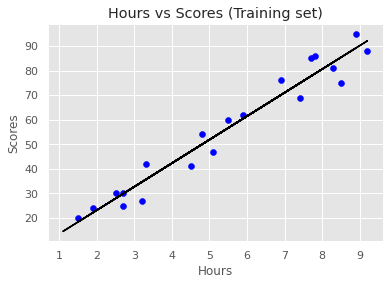

In [19]:
#visualising the training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X,line, color= 'black')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

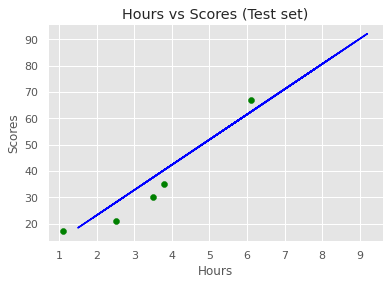

In [20]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train,  lr.predict(X_train), color= 'blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Model Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
print('Mean Absolute Error (MAE): ', round(mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error (MSE): ', round(mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error (RMSE): ', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print('R2 Score: ', round(r2_score(y_test, y_pred), 5))
print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(mean_squared_error(y_test, y_pred))), 3))

Mean Absolute Error (MAE):  5.379
Mean Squared Error (MSE):  32.149
Root Mean Squared Error (RMSE):  5.67
R2 Score:  0.89722
Root Mean Squared Log Error (RMSLE):  1.735


### Predicting the given question i.e for 9.25 hours of studying how much a student can score?

In [23]:
Hours = 9.25
prediction = lr.predict([[Hours]])
print("Count of Hours = {}".format(Hours))
print("Predicted Score = {}".format(prediction[0]))

Count of Hours = 9.25
Predicted Score = 92.57201837282052


### Hence, 92.57% can a student score if he study for 9.25 hours as per our model